<h1 align="center">Zewail City of Science and Technology</h1>
<h2 align="center">CIE 417 (Fall 2020) </h2>
<h2 align="center">Lab 2: Data Manipulation </h2>
<h3 align="center">Prepared by: Aya Elzahy</h3>

#Getting started: create a dataframe

In [ ]:
import pandas as pd

data = {
    'apples': [3, 2, 0, 1], 
    'oranges': [0, 3, 7, 2]
}

order = pd.DataFrame(data)
order


,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


In [ ]:
order.iloc[0]

apples     3
oranges    0
Name: 0, dtype: int64

In [ ]:
#Let's have customer names as our index:
order = pd.DataFrame(data, index=['June', 'Robert', 'Lily', 'David'])
order


,apples,oranges
June,3,0
Robert,2,3
Lily,0,7
David,1,2


In [ ]:
#So now we could locate a customer's order by using their name:
order.loc['June']


apples     3
oranges    0
Name: June, dtype: int64

In [ ]:
order.iloc[0]


apples     3
oranges    0
Name: June, dtype: int64

#Let's work with real data

##STEP 1: Get Housing Data

you will just download a single compressed file, housing .tgz, which contains a comma-separated value (CSV) file called housing.csv with all the data.

In [ ]:
import os
import tarfile
import urllib
import urllib.request


DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# create a directory for the dataset and extract it there
if not os.path.isdir(HOUSING_PATH):
  os.makedirs(HOUSING_PATH)
  tgz_path = os.path.join(HOUSING_PATH, "housing.tgz")
  urllib.request.urlretrieve(HOUSING_URL, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=HOUSING_PATH)
  housing_tgz.close()

##STEP 2: Load data from CSV file and explore it

In [ ]:
import pandas as pd
csv_path= '/content/datasets/housing/housing.csv' 
pd.read_csv(csv_path)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


**Think**

Did the command "*pd.read_csv(csv_path)*" save the data to any variables? Can you access it?

In [ ]:
housing_data= pd.read_csv(csv_path)
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Notice**

The total_bed
rooms attribute has only 20,433 non-null values, meaning that 207 districts are missing
this feature. We will need to take care of this later.

In [ ]:
housing_data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

##STEP 3: Get some common statistics

In [ ]:
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


1. Note that the null values are ignored (so, for example, count of total_bedrooms is 20,433, not 20,640).

2. The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations falls. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37.

##STEP 4: Visualization

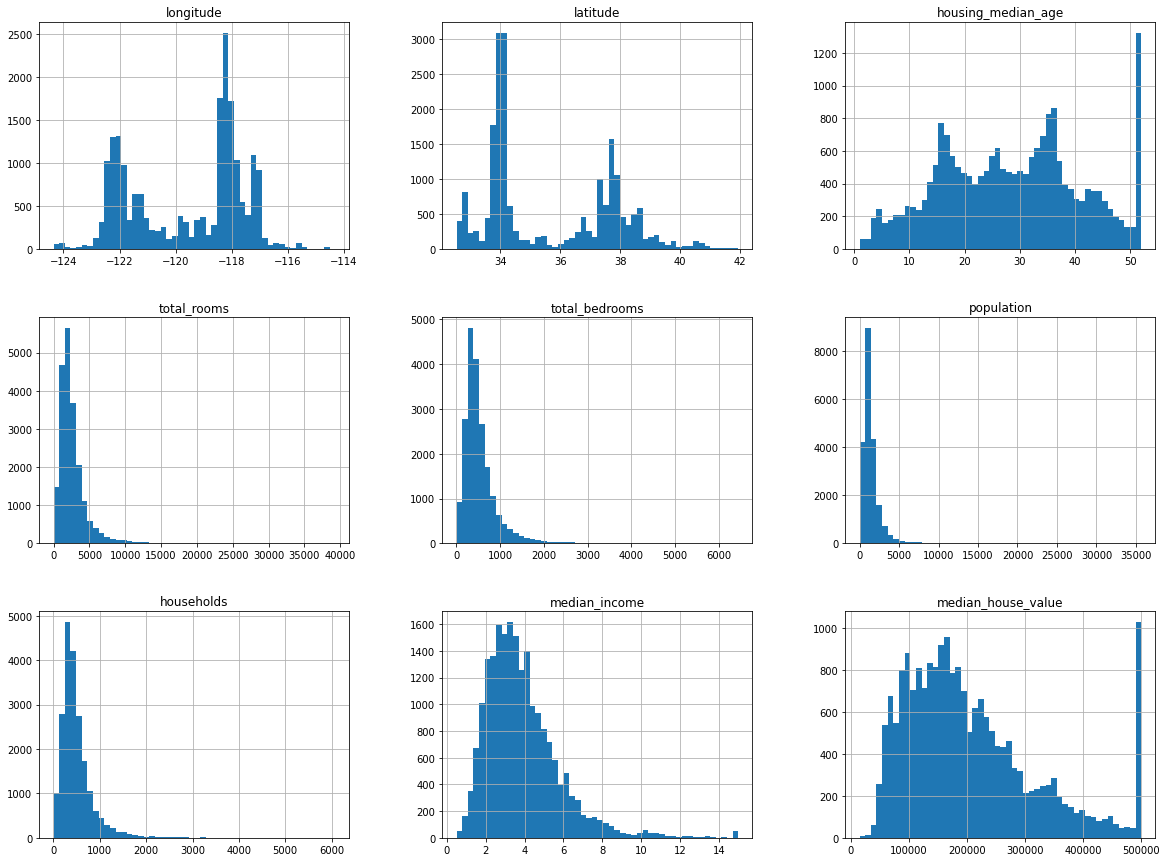

In [ ]:
import matplotlib.pyplot as plt
housing_data.hist(bins=50, figsize=(20,15))
plt.show()

Notice that many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.

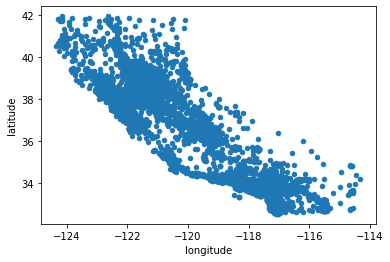

In [ ]:
housing_data.plot(kind="scatter", x="longitude", y="latitude")


It is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points. 
Alpha is blending value, between 0 (transparent) and 1 (opaque).



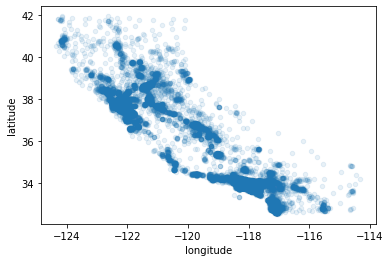

In [ ]:
housing_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

##STEP 5: look for correlation

In [ ]:
corr_matrix = housing_data.corr()

#Now let’s look at how much each attribute correlates with the median house value:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [ ]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


**The correlation coefficient ranges from –1 to 1.**

When it is close to 1, it means that there is a strong positive correlation; for example, the median house value tends to go up when the median income goes up.

When the coefficient is close to –1, it means that there is a strong negative correlation; you can see a small negative correlation between the latitude and the median house value(i.e., prices have a slight tendency to go down when you go north). 

Finally, coefficients close to zero mean that there is no linear correlation.

**Add features to the dataset**

In [ ]:
housing_data["rooms_per_household"] = housing_data["total_rooms"]/housing_data["households"]
housing_data["bedrooms_per_room"] = housing_data["total_bedrooms"]/housing_data["total_rooms"]
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096


In [ ]:
corr_matrix = housing_data.corr()

#Now let’s look at how much each attribute correlates with the median house value:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value     1.000000
median_income          0.688075
rooms_per_household    0.151948
total_rooms            0.134153
housing_median_age     0.105623
households             0.065843
total_bedrooms         0.049686
population            -0.024650
longitude             -0.045967
latitude              -0.144160
bedrooms_per_room     -0.255880
Name: median_house_value, dtype: float64

Not bad! The new bedrooms_per_room attribute is much more correlated with the median house value than the total number of rooms or bedrooms. Apparently houses with a lower bedroom/room ratio tend to be more expensive.

##STEP 6: Deal with missing data

You noticed earlier that the total_bedrooms attribute has some missing values, so let’s fix this. 

You have three options:

• Get rid of the corresponding districts.

• Get rid of the whole attribute.

• Set the values to some value (zero, the mean, the median, etc.).

In [ ]:
housing_data.dropna(subset=["total_bedrooms"]) # option 1
housing_data.drop("total_bedrooms", axis=1) # option 2
median = housing_data["total_bedrooms"].median() # option 3
housing_data["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
housing_data.dropna(subset=["total_bedrooms"]) #option 1

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892


In [ ]:
housing_data= housing_data.dropna() #Not specifying a column 
housing_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892


Let's try this out on a small dataframe for a better understanding

In [ ]:
import numpy as np
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', np.nan],
                   "age": [pd.NaT, 4,6]})
df

,name,toy,age
0,Alfred,NaN,NaT
1,Batman,Batmobile,4
2,Catwoman,NaN,6


In [ ]:
#Option 1
df.dropna(subset= ["toy"])


,name,toy,age
1,Batman,Batmobile,4


In [ ]:
df

,name,toy,age
0,Alfred,NaN,NaT
1,Batman,Batmobile,4
2,Catwoman,NaN,6


In [ ]:
df.dropna(subset= ["toy"], inplace= True)
df

,name,toy,age
1,Batman,Batmobile,4


In [ ]:
#Option 2
df.drop("toy", axis=1, inplace= True)
df

,name,age
0,Alfred,NaT
1,Batman,4
2,Catwoman,6


In [ ]:
median = df["age"].median() # option 3
df["age"].fillna(median, inplace=True)

In [ ]:
df

,name,toy,age
0,Alfred,NaN,5.0
1,Batman,Batmobile,4.0
2,Catwoman,NaN,6.0


#**Your turn!**

## Task 1 [1 point] (Estimated 5 mins)

Automatically replace the missing values in the whole dataset with their mean using sklearn SimpleImputer method. 



In [ ]:
#Your code here
from sklearn.impute import SimpleImputer
housing_numeric_columns= housing_data.drop(columns=['ocean_proximity'])

##Task 2 [4 points] (Estimated 15 mins)


Normalize and standardize the features in housing dataset you obtained from step 1. Compare the results to the below code to make sure your implementation is accurate. 

**Normalization** refers to rescaling real valued numeric attributes into the range 0 and 1.

**Standardization** refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). 

standardized value= (value- mean)/std





In [ ]:
from sklearn import preprocessing
# scale the data attributes
scaled_data = preprocessing.minmax_scale((housing_numeric_columns))
scaled_data


array([[0.21115538, 0.5674814 , 0.78431373, ..., 0.90226638, 0.0435123 ,
        0.05176768],
       [0.21215139, 0.565356  , 0.39215686, ..., 0.70824656, 0.03822395,
        0.06199621],
       [0.21015936, 0.5642933 , 1.        , ..., 0.69505074, 0.05275646,
        0.03279558],
       ...,
       [0.31175299, 0.73219979, 0.31372549, ..., 0.15938285, 0.03090386,
        0.12797003],
       [0.30179283, 0.73219979, 0.33333333, ..., 0.14371281, 0.03178269,
        0.13321386],
       [0.30976096, 0.72582359, 0.29411765, ..., 0.15340349, 0.03125246,
        0.13464991]])

In [ ]:
housing_scaled= pd.DataFrame(scaled_data, columns=housing_numeric_columns.columns)
housing_scaled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266,0.043512,0.051768
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247,0.038224,0.061996
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051,0.052756,0.032796
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783,0.035241,0.093843
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638,0.038534,0.080107
...,...,...,...,...,...,...,...,...,...,...,...
20428,0.324701,0.737513,0.470588,0.042296,0.057883,0.023599,0.054103,0.073130,0.130105,0.029769,0.138472
20429,0.312749,0.738576,0.333333,0.017676,0.023122,0.009894,0.018582,0.141853,0.128043,0.037344,0.128009
20430,0.311753,0.732200,0.313725,0.057277,0.075109,0.028140,0.071041,0.082764,0.159383,0.030904,0.127970
20431,0.301793,0.732200,0.333333,0.047256,0.063315,0.020684,0.057227,0.094295,0.143713,0.031783,0.133214


In [ ]:
# standardize the data attributes
standardized_data = preprocessing.scale(housing_numeric_columns)
print(standardized_data.shape)
housing_standardized= pd.DataFrame(standardized_data, columns=housing_numeric_columns.columns)
housing_standardized

(20433, 11)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room
0,-1.327314,1.051717,0.982163,-0.803813,-0.970325,-0.973320,-0.976833,2.345163,2.128819,0.625395,-1.146024
1,-1.322323,1.042355,-0.606210,2.042130,1.348276,0.861339,1.670373,2.332632,1.313626,0.324942,-0.987254
2,-1.332305,1.037674,1.855769,-0.535189,-0.825561,-0.819769,-0.843427,1.782939,1.258183,1.150594,-1.440514
3,-1.337296,1.037674,1.855769,-0.623510,-0.718768,-0.765056,-0.733562,0.932970,1.164622,0.155467,-0.492925
4,-1.337296,1.037674,1.855769,-0.461970,-0.611974,-0.758879,-0.628930,-0.013143,1.172418,0.342549,-0.706141
...,...,...,...,...,...,...,...,...,...,...,...
20428,-0.758318,1.800677,-0.288535,-0.444580,-0.388895,-0.511787,-0.443207,-1.216727,-1.115492,-0.155420,0.199820
20429,-0.818212,1.805358,-0.844466,-0.887557,-0.920488,-0.943315,-1.008223,-0.692044,-1.124155,0.274959,0.037412
20430,-0.823203,1.777272,-0.923885,-0.175042,-0.125472,-0.368826,-0.173778,-1.143171,-0.992477,-0.090943,0.036808
20431,-0.873115,1.777272,-0.844466,-0.355344,-0.305834,-0.603564,-0.393506,-1.055136,-1.058316,-0.041013,0.118204


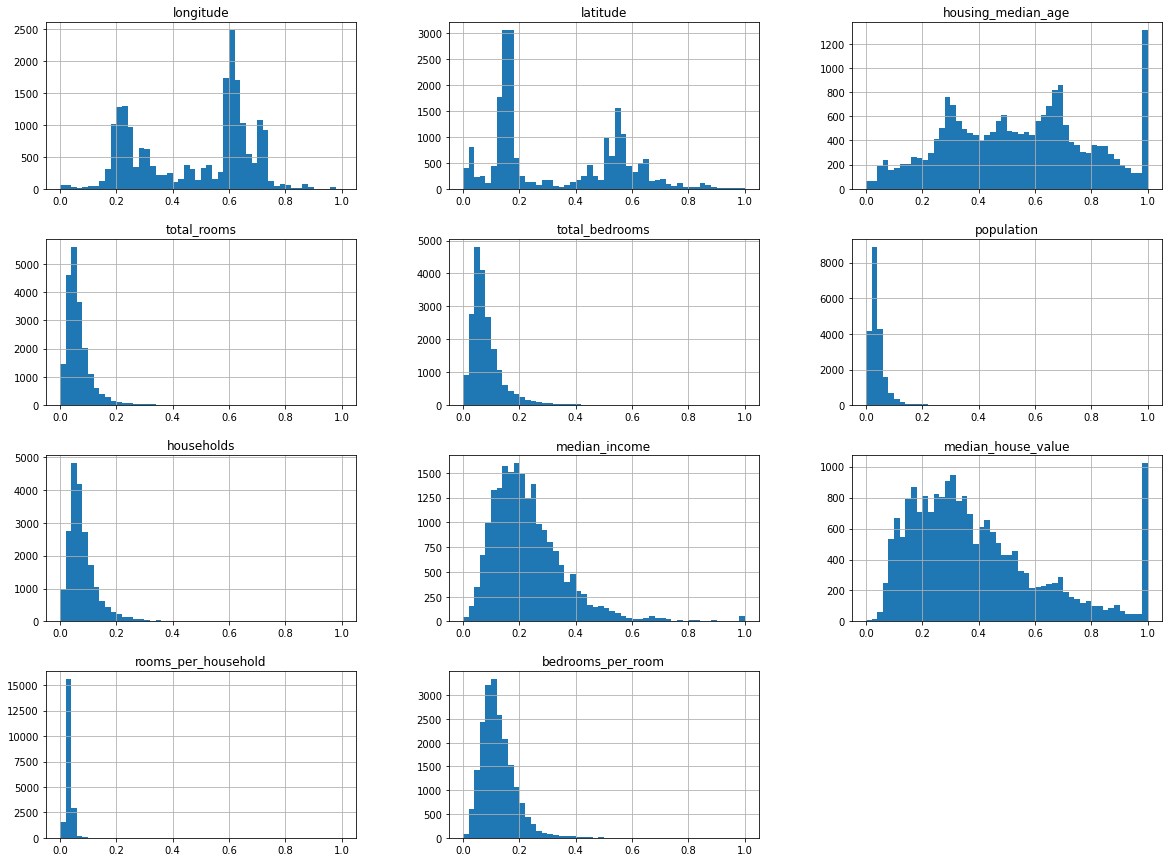

In [ ]:
housing_scaled.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
housing_scaled.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,0.476027,0.328716,0.541825,0.067005,0.083313,0.039854,0.081966,0.232498,0.395597,0.032505,0.125599
std,0.199560,0.227030,0.246898,0.055579,0.065392,0.031761,0.062868,0.130984,0.238011,0.017602,0.064425
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.253984,0.147715,0.333333,0.036828,0.045779,0.021974,0.045881,0.142329,0.215465,0.025487,0.083808
50%,0.583665,0.182784,0.549020,0.054046,0.067349,0.032596,0.067094,0.209418,0.339588,0.031083,0.114625
75%,0.631474,0.550478,0.705882,0.079887,0.100248,0.048180,0.099161,0.292693,0.514845,0.036907,0.155356
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


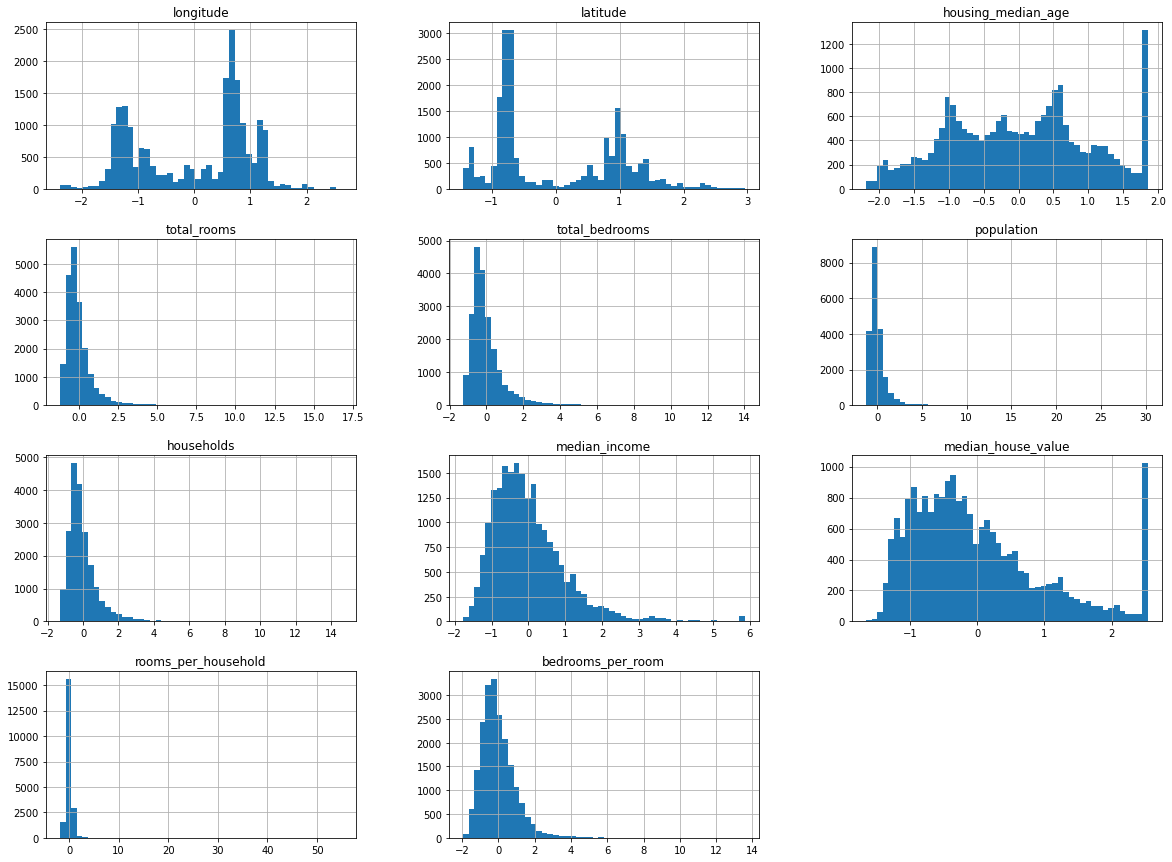

In [ ]:
housing_standardized.hist(bins=50, figsize=(20,15))
plt.show()

##Task 3 [1 point] (Bonus) (Estimated 10 mins)


Create a copy of housing_data then replace the string values in the Ocean Proximity column with numbers. What are the advantages and disadvantages of your chosen method?




In [ ]:
#Your code here


##Task 4 [1 point] (Estimated 5 mins)

Create another dataframe where ocean proximity values are only NEAR BAY. Your code should operate on housing_data not the copy you created in step 3.



In [ ]:
#Your code here

## Task 5 [4 points] (Estimated 15 mins)

1. Read pokemon data from https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6 into a dataframe. **[0.5 p]**

2. Print the names of the numeric features. **[0.5 p]**

3. Get the mean of each numeric feature an display it in a dataframe that has 2 columns (feature and mean). **[1 p]**

4. Print the feature with the smallest mean. **[0.25 p]**

5. What is the number of unique values in the "Attack" feature? **[0.25 p]**

6. How many records with a type 1 value of fire and generation value of 4? **[0.5 p]** 

7. create another dataframe pokemon_subset where Attack value is in [46,15,130,74,124,123,131]. Sort descendingly by 'Total'. **[1 p]**

In [ ]:
#Your code here

#References

- Hands-on Machine Learning with Scikit-learn, Keras & Tensorflow, 2nd Edition
